In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Plot a sample radial Gaussian


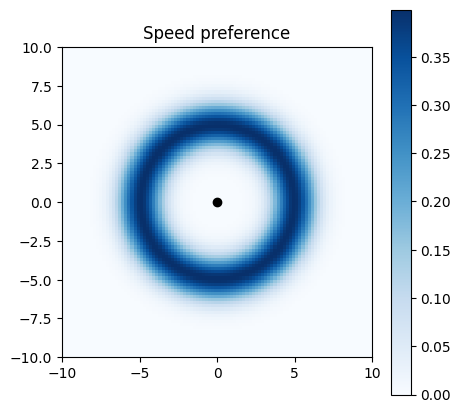

In [2]:
def radial_gaussian(X, Y, v_preferred, sigma):
    V = np.sqrt(X**2 + Y**2)

    return np.exp(-(V-v_preferred)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

L = 10
sigma_v = 1
v_preferred = 5

x = np.linspace(-L, L, 100)
y = np.linspace(-L, L, 100)
X, Y = np.meshgrid(x, y)

fig,ax = plt.subplots(figsize=(5,5))
im = ax.imshow(radial_gaussian(X,Y,v_preferred,sigma_v),extent=[-L, L, -L, L], origin='lower', cmap='Blues')
ax.scatter(0,0,marker='o',color=['k'])
ax.set_aspect('equal')
ax.set_title('Speed preference')
plt.colorbar(im)

# Plot a sample angular Gaussian


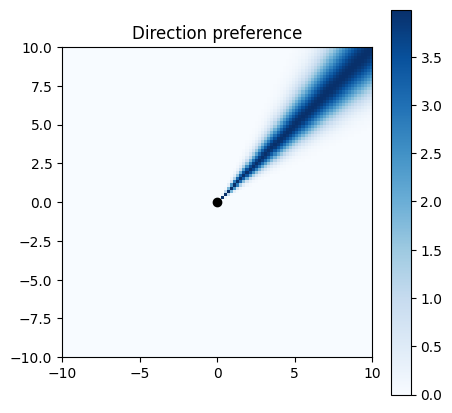

In [10]:
def angular_gaussian(X, Y, theta_preferred, sigma):
    theta = np.arctan2(Y,X)

    #there is a discontinuity when taking the difference of angles (2pi \equiv 0 !), so always choose the smaller difference
    d_theta = theta-theta_preferred
    d_theta[d_theta > np.pi] += -2*np.pi
    d_theta[d_theta < - np.pi] += 2*np.pi
    return np.exp(-(d_theta)**2/(2*sigma**2))/(np.sqrt(2*np.pi)*sigma)

L = 10

sigma_t = 0.1
theta_preferred = np.pi/4

x = np.linspace(-L, L, 100)
y = np.linspace(-L, L, 100)
X, Y = np.meshgrid(x, y)

fig,ax = plt.subplots(figsize=(5,5))
im = ax.imshow(angular_gaussian(X,Y,theta_preferred,sigma_t),extent=[-L, L, -L, L], origin='lower', cmap='Blues')
ax.scatter(0,0,marker='o',color=['k'])
ax.set_aspect('equal')
ax.set_title('Direction preference')
plt.colorbar(im)

# Combining them


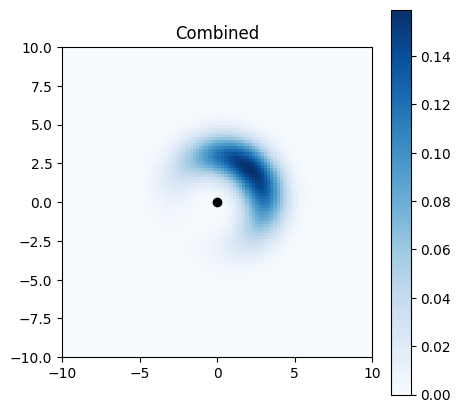

In [12]:
def combined_radial_angular_gaussian(X,Y,c_v,c_t,v_preferred,theta_preferred,sigma_v,sigma_t):
    r = radial_gaussian(X, Y, v_preferred, sigma_v)
    a = angular_gaussian(X, Y, theta_preferred, sigma_t)

    #return (c_v * r + c_t * a)/(c_v+c_t)
    return r*a


L = 10
sigma_t = 1
theta_preferred = np.pi/4
sigma_v = 1
v_preferred = 3
c_v = 1
c_t = 1

x = np.linspace(-L, L, 100)
y = np.linspace(-L, L, 100)
X, Y = np.meshgrid(x, y)

fig,ax = plt.subplots(figsize=(5,5))
im = ax.imshow(combined_radial_angular_gaussian(X,Y,c_v,c_t,v_preferred,theta_preferred,sigma_v,sigma_t),extent=[-L, L, -L, L], origin='lower', cmap='Blues')
#ax.contour(X,Y,combined_radial_angular_gaussian(X,Y,c_v,c_t,v_preferred,theta_preferred,sigma_v,sigma_t),levels=3,colors='k')
ax.scatter(0,0,marker='o',color=['k'])
ax.set_aspect('equal')
ax.set_title(fr"Combined")
plt.colorbar(im)

# Systematically varying parameters

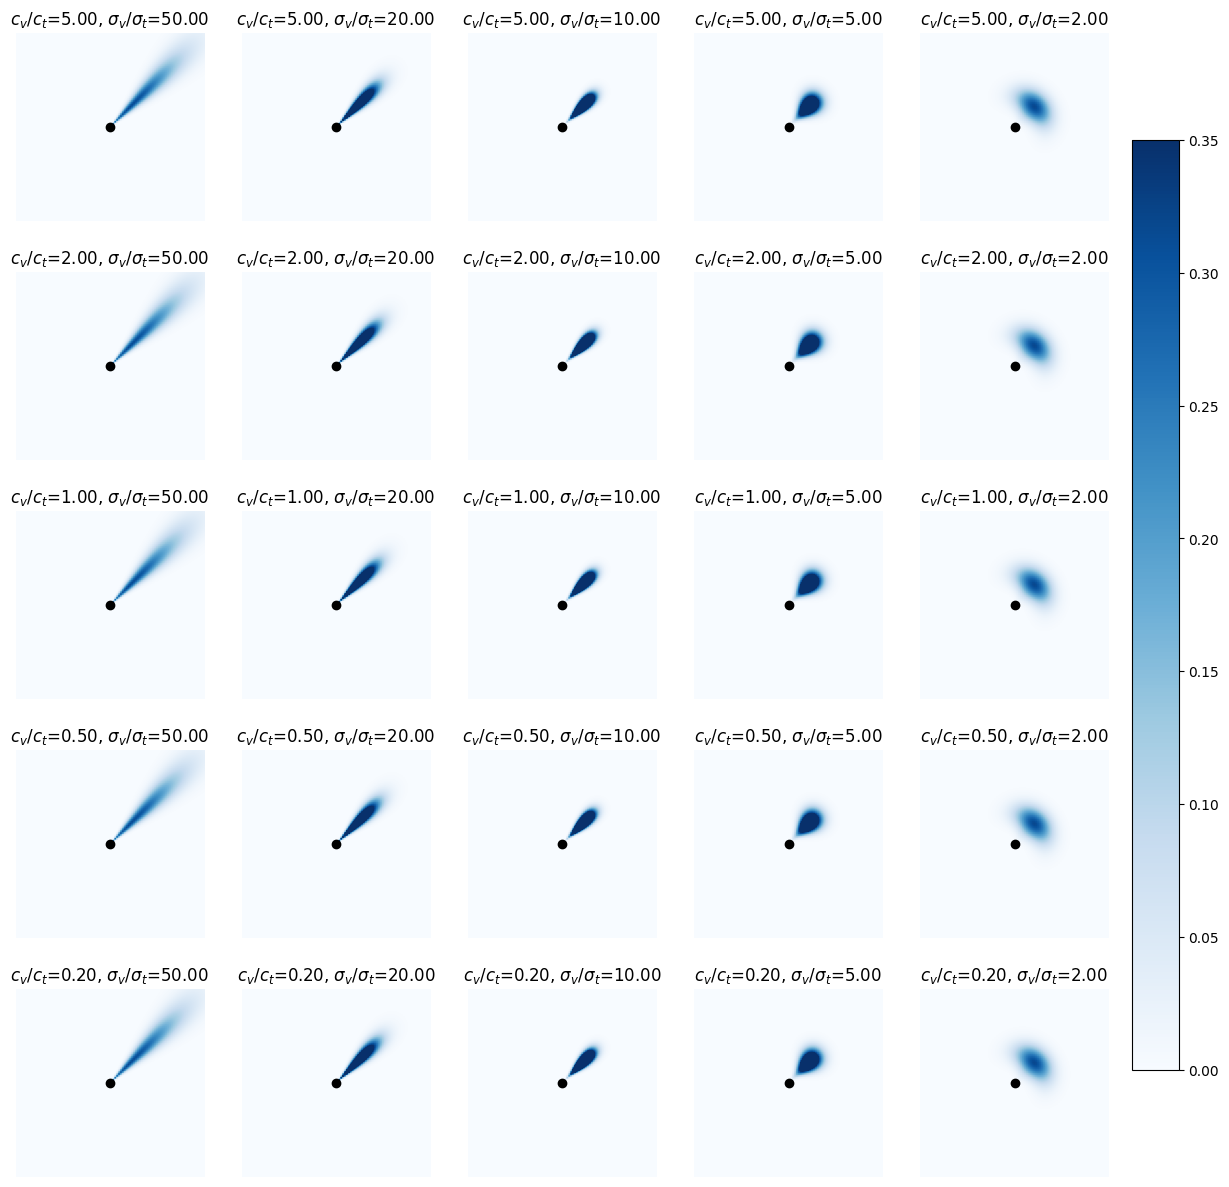

In [13]:
sigmas = [[5,0.1],[2,0.1],[1,0.1],[1,0.2],[1,0.5]]
coeffs =[[5,1],[2,1],[1,1],[1,2],[1,5]]

fig,ax = plt.subplots(len(coeffs),len(sigmas),figsize=(len(sigmas)*3,len(coeffs)*3))

L = 10
x = np.linspace(-L, L, 100)
y = np.linspace(-L, L, 100)
X, Y = np.meshgrid(x, y)

theta_preferred = np.pi/4
v_preferred = 3

for i in range(len(coeffs)):
    for j in range(len(sigmas)):
        c_v = coeffs[i][0]
        c_t = coeffs[i][1]
        sigma_v = sigmas[j][0]
        sigma_t = sigmas[j][1]

        im = ax[i,j].imshow(combined_radial_angular_gaussian(X,Y,c_v,c_t,v_preferred,theta_preferred,sigma_v,sigma_t),extent=[-L, L, -L, L], origin='lower', cmap='Blues',vmin=0,vmax=0.35)
        #ax[i,j].contour(X,Y,combined_radial_angular_gaussian(X,Y,c_v,c_t,v_preferred,theta_preferred,sigma_v,sigma_t),levels=3,colors='k')
        ax[i,j].scatter(0,0,marker='o',color=['k'])
        ax[i,j].set_aspect('equal')
        ax[i,j].set_axis_off()
        ax[i,j].set_title(fr"$c_v/c_t$={c_v/c_t:.2f}, $\sigma_v/\sigma_t$={sigma_v/sigma_t:.2f} ")

fig.colorbar(im, ax=ax, orientation='vertical', fraction=0.04, pad=0.02)
